In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp

In [26]:
depth = xr.open_dataset('C:/Users/eirik/Master/Data/depth_res.nc')['Depth']

In [27]:
depth = depth.where(depth>0,np.nan)

In [47]:
north_zonal = depth.sel(Y=79,method='nearest').sel(X=slice(-20,11)).dropna(dim="X")

display(north_zonal)

<xarray.DataArray 'Depth' (X: 546)>
array([  32.        ,   49.        ,   75.71156861,  104.        ,
        135.        ,  168.901138  ,  198.5       ,  221.2822848 ,
        242.75211824,  261.32393127,  277.40337954,  293.5       ,
        303.        ,  314.34991283,  322.        ,  332.27439331,
        339.96961241,  350.5       ,  352.28113478,  341.        ,
        341.        ,  341.        ,  341.        ,  341.        ,
        335.44987793,  331.5       ,  318.12028328,  312.5       ,
        302.77916176,  296.24708967,  293.5       ,  284.        ,
        281.59735431,  276.28516979,  274.5       ,  261.71262765,
        255.5       ,  240.06836579,  227.        ,  217.5       ,
        200.08348325,  185.72805103,  170.        ,  150.71767765,
        112.90299774,   74.39583857,   54.        ,   51.22917877,
         49.44535669,   49.        ,   44.        ,   43.64460375,
         42.43114104,   40.92685361,   40.        ,   35.        ,
         35.        ,   34.48204525,   34.2865155 ,   34.2131301 ,
         33.72661303,   34.85024368,   35.        ,   40.        ,
         41.2395512 ,   42.98164582,   44.        ,   49.        ,
         49.22025582,   51.83893436,   54.        ,   59.5       ,
         59.9249365 ,   63.4534625 ,   65.        ,   71.70198312,
         75.23905184,   77.        ,   77.        ,   75.86267411,
...
       2481.31680391, 2469.        , 2469.        , 2446.5219127 ,
       2412.        , 2412.        , 2393.        , 2391.48584225,
       2368.02307538, 2348.84208124, 2307.5       , 2276.82780537,
       2272.68606891, 2260.        , 2239.8934419 , 2193.5       ,
       2108.        , 2062.02459533, 2032.        , 2003.5       ,
       1946.5       , 1872.10051066, 1813.5       , 1756.5       ,
       1690.        , 1633.        , 1566.5       , 1491.3143375 ,
       1433.5       , 1381.03371425, 1338.68318137, 1300.5       ,
       1269.26307327, 1243.5       , 1215.        , 1212.11203412,
       1228.73590709, 1243.5       , 1224.5       , 1191.63515749,
       1158.        , 1167.5       , 1175.38757236, 1173.19518661,
       1155.09459264, 1139.        , 1120.        , 1092.70157105,
       1056.15345173, 1015.5       ,  968.        ,  907.70301302,
        825.5       ,  721.        ,  597.5       ,  415.37561569,
        265.        ,  243.83849071,  227.        ,  219.38129542,
        208.        ,  202.06999359,  198.5       ,  198.5       ,
        200.87835693,  200.42950745,  205.38023869,  199.1754212 ,
        200.50510051,  204.3193626 ,  208.        ,  184.88720478,
        152.        ,   83.5       ,   49.07314668,   41.20498185,
         40.        ,   32.        ])
Coordinates:
  * X        (X) float64 -17.75 -17.7 -17.66 -17.61 ... 10.12 10.21 10.3 10.39
    Y        float64 79.0
    XC       (X) float64 -17.75 -17.7 -17.66 -17.61 ... 10.12 10.21 10.3 10.39
    YC       (X) float64 79.0 79.0 79.0 79.0 79.0 ... 79.0 79.0 79.0 79.0 79.0
Attributes:
    description:    fluid thickness in r coordinates (at rest)
    standard_name:  ocean_depth
    long_name:      ocean depth
    units:          m
    coordinate:     XC YC

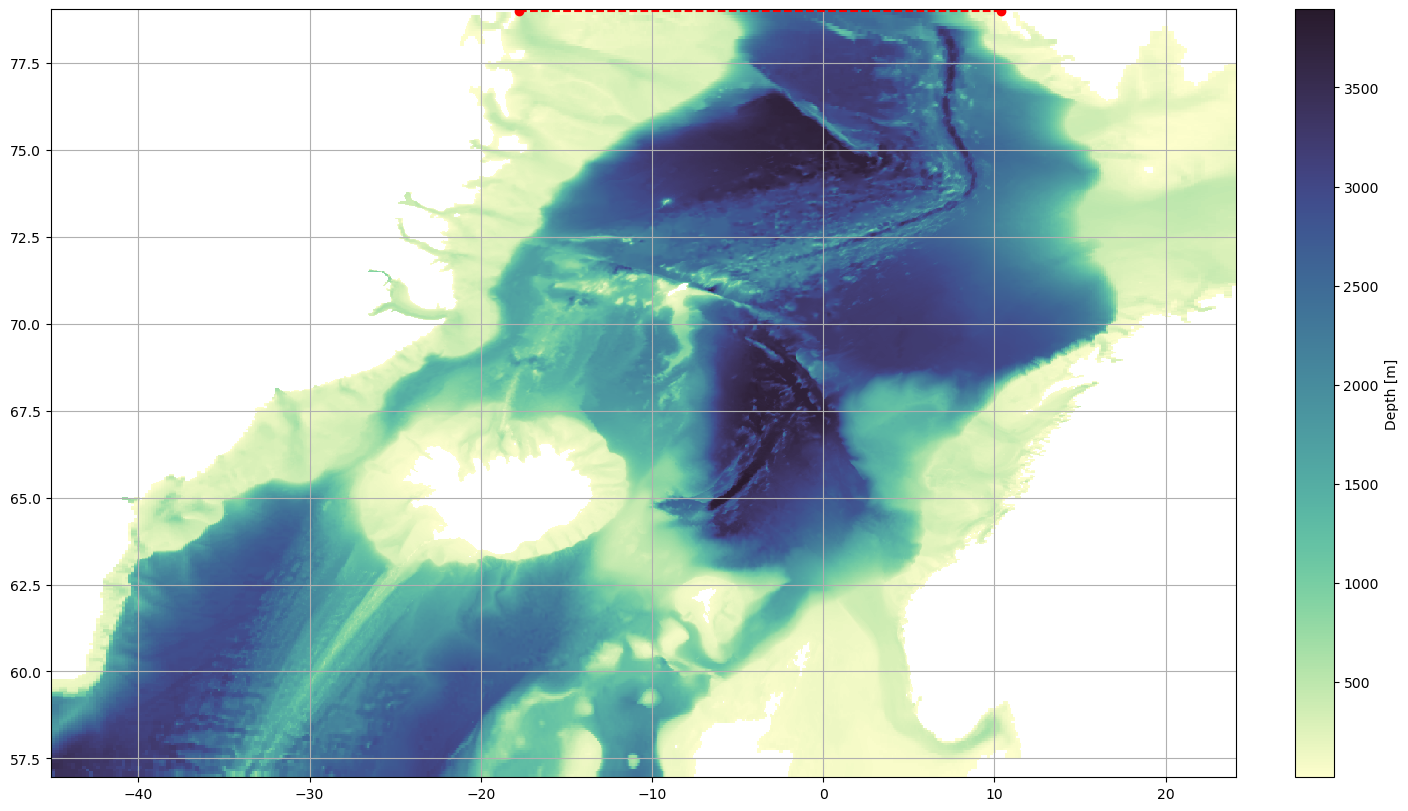

In [52]:
fig, ax = plt.subplots(figsize=(14,8),layout='constrained')
mesh = ax.pcolormesh(depth.X,depth.Y,depth,cmap=cmo.deep)
cbar = fig.colorbar(mesh)
cbar.set_label('Depth [m]')
ax.grid()

ax.plot([north_zonal.X[0],north_zonal.X[-1]],[north_zonal.Y,north_zonal.Y],linestyle='--',color='r')
ax.scatter(north_zonal.X[0],north_zonal.Y,color='r')
ax.scatter(north_zonal.X[-1],north_zonal.Y,color='r')